<a href="https://colab.research.google.com/github/Guliko24/NetZoo_network/blob/main/GRN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# This is a block of code working with single files from MCF7 and MDA-MB-231 cell lines



In [1]:
#import all the packages as needed
import pandas as pd
import networkx as nx

In [2]:
# prompt: let's load Gdrive onto notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Navigate to your Google Drive files
%cd /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


In [9]:
#let's read the MCF7_TF_Genes dataset and make changes
df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv')

In [10]:
#let's do initial data assessment
df_MCF7_TF_Genes.head()


,Row,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,TMEM88,TMEM88B,TMEM89,TMEM8B,TMEM9,TMEM91,TMEM92,TMEM94,TMEM95,TMEM97
0,AHR,-1.443279,-1.967447,-2.760445,-2.073087,1.251514,0.385485,-1.715180,2.865040,0.034788,...,-0.878857,0.459640,1.375959,-1.016009,-0.242322,1.891062,-0.818321,-0.052743,-0.473725,-0.298555
1,AHRR,-1.247997,-2.028449,-2.831273,-1.976606,1.202019,0.408661,-1.723908,2.810044,0.225790,...,-0.761727,0.619967,1.403784,-0.775855,-0.152985,1.974241,-0.680559,0.012663,-0.332161,-0.117967
2,AIRE,-1.380017,2.783954,1.011333,3.807602,-3.535072,-1.611140,1.657074,-1.797554,-1.676323,...,-1.082261,-1.291455,-1.956019,-0.419732,-0.210442,-1.207542,-0.703877,-1.442472,-0.474597,-0.882657
3,ALX1,-2.001329,3.642444,-0.656243,0.632257,0.204571,-0.584100,1.287642,0.738631,-1.492440,...,-1.472459,-1.322024,-0.123587,-2.152722,-2.204323,-0.050309,-2.532883,-0.852312,-2.007539,-1.760582
4,ALX3,-1.201413,0.550952,-0.211441,0.657875,-0.089130,-0.913549,0.404178,0.546880,-1.522372,...,-2.399966,-1.392676,0.684690,-2.412815,-2.458452,0.413145,-2.533361,-1.395355,-2.138298,-2.579043


In [12]:
df_MCF7_TF_Genes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Columns: 16384 entries, Row to TMEM97
dtypes: float64(16383), object(1)
memory usage: 141.5+ MB


In [13]:
print(df_MCF7_TF_Genes.describe())

              A1BG         A1CF          A2M        A2ML1      A3GALT2  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000   
mean     -0.199907     0.095889    -0.012865    -0.094739     0.198359   
std       1.678212     1.799404     2.252995     1.607752     2.163127   
min      -2.760505    -2.629948    -4.034686    -2.626029    -9.267207   
25%      -1.401818    -1.327776    -1.436337    -1.112496    -0.999215   
50%      -0.648784    -0.230834    -0.423527    -0.377356     0.317033   
75%       0.629196     1.019549     0.892078     0.498847     1.661686   
max      12.642667    10.412639    13.711460    12.098564     6.186273   

            A4GALT        A4GNT         AAAS         AACS        AADAC  ...  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000  ...   
mean     -0.024695     0.086092     0.334350    -0.159868     0.029493  ...   
std       1.389114     1.512006     2.696839     1.433202     1.316912  ...   
min      -3.45439

In [15]:
print(df_MCF7_TF_Genes.isnull().sum())

Row       0
A1BG      0
A1CF      0
A2M       0
A2ML1     0
         ..
TMEM91    0
TMEM92    0
TMEM94    0
TMEM95    0
TMEM97    0
Length: 16384, dtype: int64


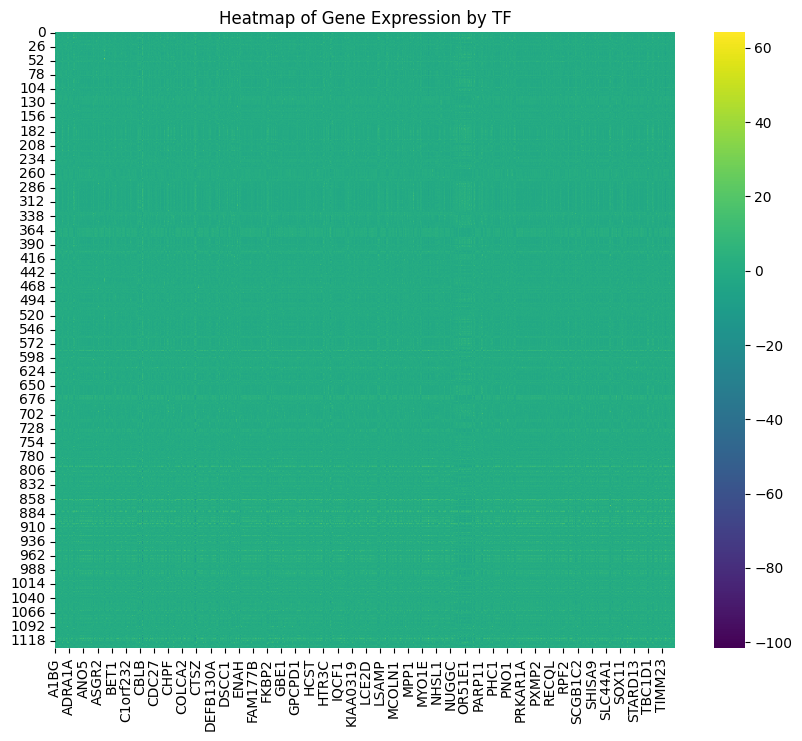

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_MCF7_TF_Genes.iloc[:, 1:], cmap='viridis')  # Skipping the first column if it's TF names
plt.title('Heatmap of Gene Expression by TF')
plt.show()


#let's convert CTCF-genes file into some adjancy matrix for future use

---


In [ ]:
# Load the CSV file into a DataFrame
df_MCF7 = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_CTCF_targets_edges.csv')
df_MCF7_all_TF=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_TF_genes_weighted_nodes150.csv')
# Display the DataFrame
print(df_MCF7)
print(df_MCF7_all_TF)

    Source  Target  Edge weight
0     CTCF   NACAD    12.263211
1     CTCF     AMT    11.245753
2     CTCF   TTC27    10.059604
3     CTCF    XYLB     9.888435
4     CTCF   THTPA     7.854461
..     ...     ...          ...
145   CTCF     CTH     3.792667
146   CTCF   CENPK     3.790138
147   CTCF  B3GAT1     3.775499
148   CTCF   REXO1     3.772165
149   CTCF   GPR20     3.765080

[150 rows x 3 columns]
      Source Target  Edge weight
0       IRX6  MEOX2    64.130060
1       IRX4  MEOX2    63.920394
2       IRX6   FIGN    60.464314
3       IRX4   FIGN    60.087284
4     ZNF180  TTC27    59.879850
..       ...    ...          ...
145   ZNF235  TTC27    32.200000
146  CREB3L2   FIGN    32.199281
147   LIN28A   FIGN    32.102345
148  CREB3L1   FIGN    32.045289
149     ETV5  MEOX2    31.962014

[150 rows x 3 columns]


In [ ]:
# Pivot the data to create the adjacency matrix
adjacency_matrix_MCF7= df_MCF7.pivot(index='Source', columns='Target', values='Edge weight').fillna(0)

# Display the adjacency matrix
print(adjacency_matrix_MCF7)


Target     ACKR3    ADGRF2        AMT    APPBP2  ARHGAP35      ASNS     ATMIN  \
Source                                                                          
CTCF    6.194519  5.257484  11.245753  3.807179  5.737962  3.924574  3.903627   

Target   B3GALT6    B3GAT1    BRICD5  ...     WDR18     WDR33     WDR38  \
Source                                ...                                 
CTCF    3.844181  3.775499  4.419022  ...  4.558751  4.904655  5.150136   

Target     WDR55      XYLB    ZBTB8B     ZG16B    ZNF250    ZNF736    ZNF75A  
Source                                                                        
CTCF    3.855257  9.888435  3.848419  3.909762  3.925584  5.928496  4.052673  

[1 rows x 150 columns]


In [ ]:
# Create a directed graph with weights directly from the edge list
G = nx.from_pandas_edgelist(df_MCF7, source='Source', target='Target', edge_attr='Edge weight', create_using=nx.DiGraph())

# Check the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

Nodes: ['CTCF', 'NACAD', 'AMT', 'TTC27', 'XYLB', 'THTPA', 'PLEKHG2', 'DTL', 'NTM', 'CDRT15L2', 'RFC1', 'POM121L2', 'ACKR3', 'CNDP1', 'UVRAG', 'TMEM106C', 'MPZL3', 'ZNF736', 'KLHL35', 'ELF3', 'ARHGAP35', 'MATK', 'INMT', 'MECP2', 'SNX5', 'NAGK', 'CDRT15', 'PRMT7', 'SLC19A1', 'ADGRF2', 'PEX14', 'MTERF1', 'WDR38', 'EXOC3', 'GALNT14', 'DNAJA2', 'CLDN5', 'RNF141', 'IDI1', 'PROZ', 'WDR33', 'EHD4', 'FCHSD2', 'SIRPB1', 'C1QTNF9', 'CLUL1', 'CIDEB', 'LCK', 'MYT1', 'RPL32', 'WDR18', 'TPRA1', 'IRF9', 'C4orf46', 'RANBP1', 'PYCARD', 'CCDC103', 'DDX5', 'TNKS1BP1', 'PDCD2', 'ITPK1', 'CRYBG3', 'BRICD5', 'FAM76B', 'SSR4', 'TMC7', 'PGAM5', 'DOK3', 'MMP28', 'CHST7', 'HGD', 'CCAR2', 'MYDGF', 'CAPRIN2', 'GGTLC1', 'TUSC2', 'TNFRSF14', 'ERI1', 'SMIM5', 'CCS', 'JMJD4', 'CDK10', 'CRYAA', 'SPR', 'RHBG', 'KIF18B', 'PCSK6', 'IFIT1', 'STUB1', 'MRGPRF', 'GPT', 'SPOCD1', 'PTPRE', 'SLBP', 'HCLS1', 'SOWAHB', 'GATA2', 'NUP88', 'RECQL5', 'TTC31', 'GSTT4', 'ICMT', 'GGT1', 'MPDU1', 'COMT', 'ZNF75A', 'MAML1', 'VBP1', 'RAB32'

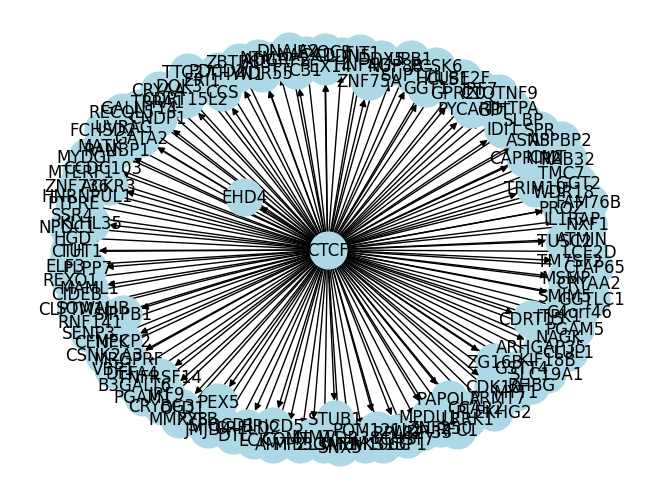

In [ ]:
import matplotlib.pyplot as plt

# Set a layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [ ]:
#let's try running another file with TF-genes


In [ ]:
# Create a directed graph with weights directly from the edge list
G = nx.from_pandas_edgelist(df_MCF7_all_TF, source='Source', target='Target', edge_attr='Edge weight', create_using=nx.DiGraph())

# Check the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

Nodes: ['IRX6', 'MEOX2', 'IRX4', 'FIGN', 'ZNF180', 'TTC27', 'ZHX1', 'ZNF432', 'ZNF880', 'KDM2B', 'E4F1', 'PRDM9', 'ZBTB7B', 'ZNF383', 'ZNF341', 'ZNF385D', 'SCN1A', 'SIM1', 'GMEB1', 'TFDP3', 'NPAS1', 'NPAS3', 'CREM', 'SIM2', 'ATF6', 'ZNF287', 'NAIF1', 'HIF3A', 'EPAS1', 'ZNF571', 'SIX2', 'FOXK1', 'ZNF529', 'BARHL2', 'GMEB2', 'PODN', 'ZNF774', 'OVOL2', 'ZNF784', 'ZBTB2', 'RUNX2', 'ZNF792', 'XBP1', 'SIX4', 'MYBL2', 'ZNF846', 'NR5A2', 'TERF2', 'MTRNR2L1', 'HOXB1', 'MLX', 'PAX3', 'ZNF467', 'NKX6-2', 'PAX9', 'PROX2', 'ASCL2', 'FOXN2', 'ZNF444', 'RAB40A', 'ZNF501', 'ZNF148', 'ZNF283', 'RUNX3', 'ZNF71', 'CREB3L4', 'CREB3L1', 'IP6K2', 'CREBZF', 'LBX2', 'CREBL2', 'HOXA4', 'HIF1A', 'LHX8', 'NANOG', 'PAX8', 'ZFP57', 'LIN28A', 'HOXA2', 'ZBTB32', 'ZNF484', 'NFYA', 'PRSS3', 'TET1', 'SMAD5', 'KCNE1B', 'ETV5', 'TBX3', 'PROX1', 'ZNF263', 'CREB3L2', 'PAX1', 'LIN28B', 'LHX6', 'RFX6', 'ARNT', 'ARNTL2', 'ZNF267', 'HOXC11', 'HOXA5', 'ZNF304', 'ZNF235']
Edges: [('IRX6', 'MEOX2', {'Edge weight': 64.13006049}), 

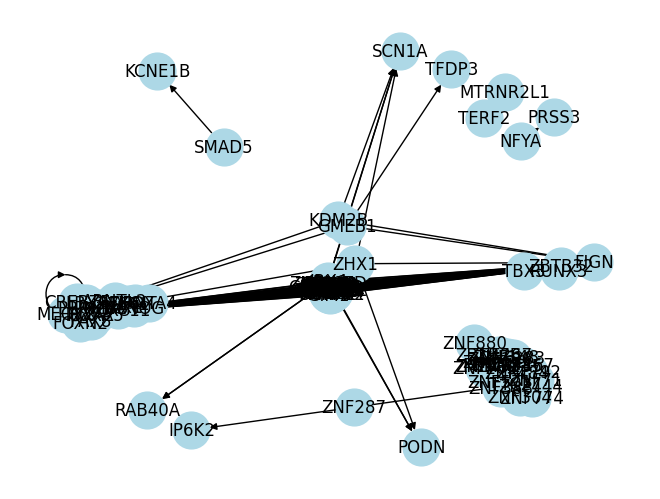

In [ ]:
import matplotlib.pyplot as plt

# Set a layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


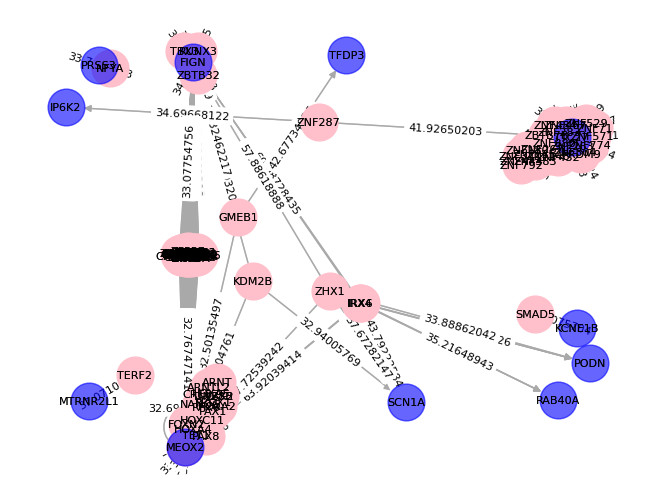

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Set a layout for the graph
pos = nx.spring_layout(G)

# Separate the nodes into "Source" and "Target"
source_nodes = set(df_MCF7_all_TF['Source'])
target_nodes = set(df_MCF7_all_TF['Target'])

# Draw the source nodes in pink
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=source_nodes, node_color="pink", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=target_nodes, node_color="blue", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
edge_labels = nx.get_edge_attributes(G, 'Edge weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()


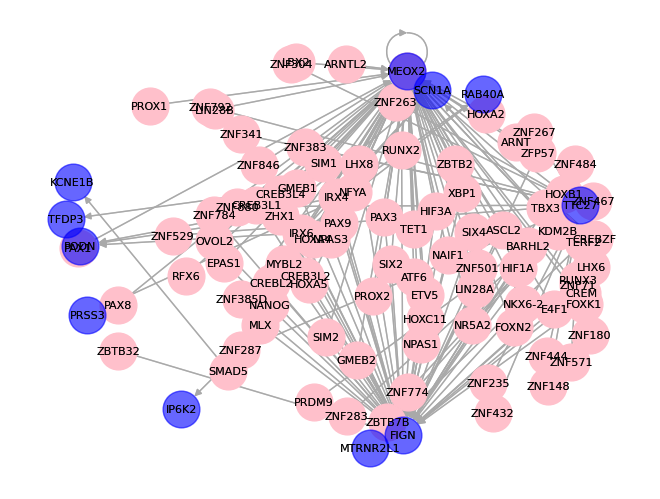

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Set a layout for the graph, using edge weights to influence node positioning
pos = nx.spring_layout(G, k=0.8, iterations=50)  # 'weight' parameter will consider edge weights

# Separate the nodes into "Source" and "Target"
source_nodes = set(df_MCF7_all_TF['Source'])
target_nodes = set(df_MCF7_all_TF['Target'])

# Draw the source nodes in pink
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=source_nodes, node_color="pink", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G, pos, with_labels=True, node_size=700, nodelist=target_nodes, node_color="blue", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
edge_labels = nx.get_edge_attributes(G, 'Edge weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()
